# Waveguides

The goal of this notebook is to investigate the fields created in waveguides.  It complements the material in Chapter 7 of _Classical Electromagnetic Radiation_ by Marion and Heald.

A ***mode*** of a waveguide is an allowed solution of Maxwell's equations.  We will investigate the following types of modes:

- TEM
- TE
- TM

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# This will give interactive plots within the notebook.
# %matplotlib notebook

# This will make interactive plots pop up in a separate window.
# It probably will not work in CoLab.
# %matplotlib tk

# This will yield static, inline plots.  The default.
# %matplotlib inline

In [38]:
# Define color scheme.
e_color = '#377eb8'
b_color = '#ff7f00'
s_color = '#4daf4a'

In [69]:
# Create a grid.
Lx = 2
Nx = 5
Ly = 2
Ny = 5
Lz = 4
Nz = 9

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
z = np.linspace(0, Lz, Nz)
X, Y, Z = np.meshgrid(x,y,z)

# Group all coordinates into a single array.
R = np.stack((X,Y,Z))

In [70]:
# Define the material.
mu = 1
epsilon = 1
n = np.sqrt(mu*epsilon)

## TEM Modes

TEM modes are guided electromagnetic waves in which the electric and magnetic field are perpendicular to the direction of propagation.  The name stands for "transverse electromagnetic" and refers to the fact that both the electric field and magnetic field are perpendicular to the direction of propagation.

Plane waves are TEM modes, but not all TEM modes are plane waves.  Here, we analyze the TEM modes that can propagate between a set of parallel conducting plates.  See Section 7.2 of _CER_ for a detailed theoretical background.

We consider modes where the electric field is parallel to the conducting plates.  These can be described as a superposition of two plane waves within the waveguide.  The amplitudes of the waves are equal, but they are out of phase and travel in different directions:
$$
\vec{k}_1 = \begin{bmatrix} 0 \\ - k_0 \cos \theta \\ + k_0 \sin \theta \end{bmatrix}
\qquad \qquad
\vec{k}_2 = \begin{bmatrix} 0 \\ + k_0 \cos \theta \\ + k_0 \sin \theta \end{bmatrix}
$$

The magnetic field and Poynting vector are computed as with plane waves.

Let's look at some of these modes.

In [56]:
# Define convenience function to compute fields.
def get_plane_wave(E0,k,R,n=1,t=0):
    """
    Return electric and magnetic field arrays for an
    electromagnetic plane wave.
    
    E0 = [Ex, Ey, Ez]  (amplitude and polarization)
    k =  [kx, ky, kz]  (wave vector)
    R  = [X, Y, Z]     (coordinate arrays)
    n                  (index of refraction)
    t                  (time)
    
    Returns
    (E,B) where
    E = [Ex, Ey, Ez]
    B = [Bx, By, Bz]
    """
    
    # Create empty arrays of the correct shape.
    E = np.zeros_like(R, dtype=complex)
    B = np.zeros_like(R, dtype=complex)
    
    # Compute phase of the plane wave.
    k0 = np.sqrt(np.sum(k**2))
    omega = k0/n
    phase = np.exp(1j*(k[0]*R[0] + k[1]*R[1] + k[2]*R[2] - omega*t))

    # Compute the electric field.
    E[0] = E0[0] * phase
    E[1] = E0[1] * phase
    E[2] = E0[2] * phase
    
    # Compute the magnetic field.
    B[0] = (k[1]*E[2] - k[2]*E[1])/omega
    B[1] = (k[2]*E[0] - k[0]*E[2])/omega
    B[2] = (k[0]*E[1] - k[1]*E[0])/omega
    
    # Return the result.
    return E,B

In [57]:
# Define the wave vector.
# Give magnitude and angle of incidence (in radians).
k = 20
theta = np.radians(89)
omega = k/n

# Set wave vector of incident wave.
k1x = 0
k1y = -k * np.cos(theta)
k1z = k * np.sin(theta)
k1 = np.array([k1x, k1y, k1z])

# Set wave vector of reflected wave.
k2x = 0
k2y = k * np.cos(theta)
k2z = k * np.sin(theta)
k2 = np.array([k2x, k2y, k2z])

# Set time of snapshot.
t0 = 2*np.pi / k * 0.00

# Define the electric field, magnetic field, and Poynting vector
# for an electromagnetic plane wave.

# Give initial direction of electric field.
# Everything else is determined by this.
# Set the amplitude and polarization.
E0 = 0.3
eHat = np.array([1,0,0])

e1 = E0 * eHat 
e2 = -e1

E1, B1 = get_plane_wave(e1,k1,R)
E2, B2 = get_plane_wave(e2,k2,R)

# Compute total electromagnetic field.
Ex = E1[0] + E2[0]
Ey = E1[1] + E2[1]
Ez = E1[2] + E2[2]

Bx = B1[0] + B2[0]
By = B1[1] + B2[1]
Bz = B1[2] + B2[2]

# Compute total Poynting vector.
Sx = 1/(8*np.pi*mu) * (Ey * Bz.conj() - Ez * By.conj())
Sy = 1/(8*np.pi*mu) * (Ez * Bx.conj() - Ex * Bz.conj())
Sz = 1/(8*np.pi*mu) * (Ex * By.conj() - Ey * Bx.conj())

<IPython.core.display.Javascript object>


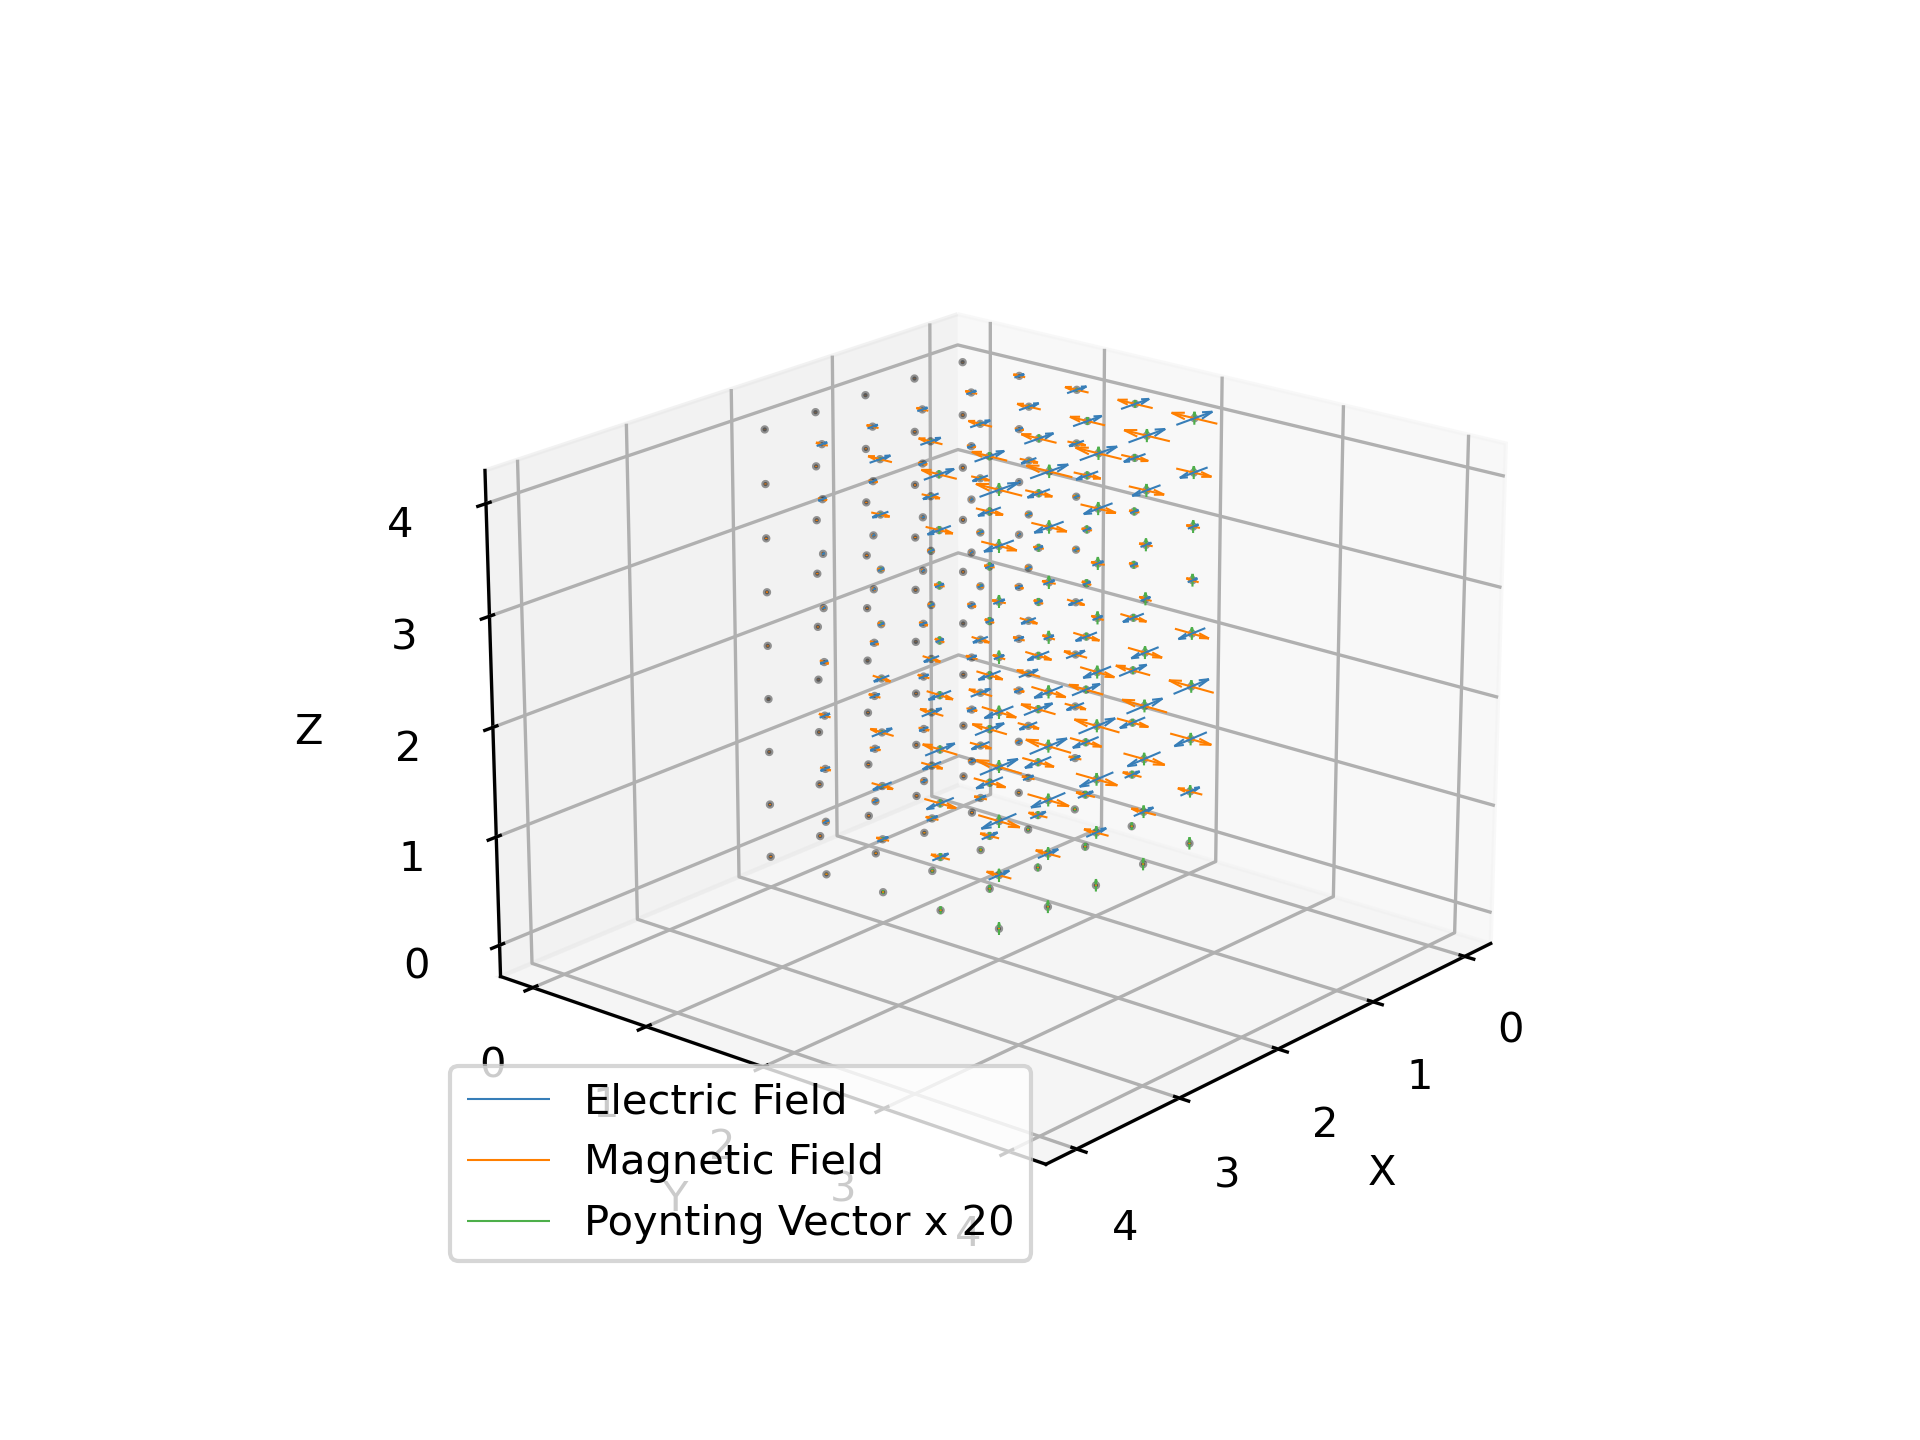

In [43]:
# Plot the field.
s_scale = 20

fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
ax.quiver3D(X,Y,Z, Ex.real, Ey.real, Ez.real, pivot='middle',
            linewidth=0.5, color=e_color, label='Electric Field')
ax.quiver3D(X,Y,Z, Bx.real, By.real, Bz.real, pivot='middle',
            linewidth=0.5, color=b_color, label='Magnetic Field')
ax.quiver3D(X,Y,Z, s_scale*Sx.real, s_scale*Sy.real, s_scale*Sz.real, pivot='middle',
            linewidth=0.5, color=s_color, label='Poynting Vector x %d' % s_scale)
ax.scatter3D(X,Y,Z,'.',s=1,c='k',alpha=0.4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.auto_scale_xyz([0, Lz], [0, Lz], [0, Lz])
ax.view_init(20,40)
ax.legend()

## Questions

Describe the field pattern.
- In what direction does the electric field point? The magnetic field? The Poynting vector?
- How do the fields change with position?
- Where is the electric field largest?
- Where is the Poynting vector largest? Smallest?

***Describe your observations below.***

1. **E** points in alternating directions, parallel to the X-axis; Along the oustide **B** points up or down, but in past the first row, it completely changes. I think **S** is always pointing in or out of the page.
2. **E** Every row and column shows field vectors that alernate pointing in the negative or positive directio; I don't see a pattern in the way magnitude of **B** changes, but along rows of **B** parallel to the x-axis, **B** direction is constant. It also looks like when **E** points positive, **B** pionts positive, and vice versa. The **B** vectors seem to change a lot in magnitude, I just can't tell if that's actual change in magnitude or the arrows just looking smaller because of the direction. I imagine **S** alternates in vs out of the page based on which way **E** and **B** are pointing, but I can't tell from the picture
3. I don't see any obvious variation in magnitude of **E**. 
4. I don't see any change in magnitude of **S**

- Observe what happens as you change the wave vector, `k`.
 - Made k = 60. The **E** fields seem to get more organized, into almost two parallel sheets. there are also places where **B** disappears. **S** does seem to be mostly pointing up now, but still very small. 
 - When I make k=1 the plots get veryy cool. **B** is very obviously circulating around the top rigth corner. **E** is pointing entirely positive, still parallel to x. **E** magnitude increases as y-value increases. **S** seems to be pointing up all around.
- Observe what happens as you change the angle of incidence, `theta`.
 - Theta = 90 gets rid of all the vectors. That makes sense because I'm pretty sure if theta were 90 there would never be incidence because the wave would be perfectly parallel to the medium
 - theta = 0 gets rid of all but **B** which alternates pointing straight up and down with consistent magnitude. Not sure why **E** is gone, but when **E** = 0 **S** = 0
 - theta = 100 gives a more identifiable pattern. **B** is all along the same axis (though still alternating direction, and decreasing in magnitude from the positive corner to the negative. The same can be said for **E**. **S** is consistently, pointing up, except where it doesn't exist in the negative corner where **E** is gone

In order to satisfy the boundary conditions of this wave guide, the electric field should vanish on the conducting plates at $y=0$ and $y=b$ (or `y = box_width`.  (Other waves do not satisfy Maxwell's equations.  Although we can plot them, they are impossible to create in the real world.)

Adjust the ***angle*** and ***wave vector*** until you achieve this.

You may find the discussion on page 233 of _CER_ helpful ...

**Congratulations!**  You just created a TEM mode for this waveguide.

- What wave vector and angle did you use?
- How do the fields compare with your general observations above?  I.e., is there anything special about this field, aside from the fact that the electric field vanishes at the boundaries?

***Describe your observations below.***

- At theta = 100 and k = 10, **E** vanishes at y=0 and at half of y=b
- At theta = 45 and k=20, **E** vanished at both! In this case, I don't see anything extraordinary compared to the others. **E** is still alternating +/- and still seems to be organized in an upper and lower sheet. **B** changes related to **E** when it's introduced, and **S** seems relatively consistent.

Keep the magnitude of the wave vector constant, but adjust the ***angle*** until you find another value that gives zero field on the boundaries at $y=0$ and $y=b$.

- What wave vector and angle did you use this time?
- How do the fields for this TEM mode compare with your first TEM mode?

***Describe your observations below.***

I started with theta = 135 (keeping k=20) because that's the same angle from the other side. This gave the same exact pattern, but this felt like cheating so I also tried...theta = 80; theta = 22.5; (this didn't give what I needed, but it was a very cool effect) theta = 10; theta = 100... I can't find any!

## TE Modes

Now we will turn our attention to a different kind of waveguide: a hollow pipe.  As shown in _CER_ at the end of Section 7.3, there are no possible TEM modes in a hollow pipe.  However, we can find TE modes — in which the electric field is perpendicular to the direction of propagation but the magnetic field is not — and TM modes — in which the magnetic field is perpendicular to the direction of propagation and the electric field is not.  We focus on the rectangular waveguide of Section 7.5.

In a "remarkable set of equations" (7.52–55), Heald and Marion show that all of the components of the electric and magnetic fields can be obtained from the longitudinal components, $B_z$ and $E_z$.  For a TE mode, $E_z = 0$, and for a TM mode, $B_z=0$.  So we only need to know one component of the field to solve for the entire set.

For TE modes, the normal derivative of the longitudinal magnetic field must vanish on the boundaries.  This gives

$$
B_z = B_0 \, e^{i(k_z z - \omega t)} \, \cos \left( \dfrac{M \pi x}{a} \right) \, \cos\left( \dfrac{N \pi y}{b} \right)
$$

$M$ and $N$ are positive integers. $a$ and $b$ are the length and width of the rectangle.  The code below will generate a field plot for a single TE mode.

In [58]:
t = 0

# Define the mode.
M = 1
N = 1

# Define the longitudinal wave vector.
kz = np.pi / 2

# Determine compute the transverse wave vector and frequency.
a = Lx
b = Ly
kx = M*np.pi/a
ky = N*np.pi/b
omega = np.sqrt(kx**2 + ky**2 + kz**2) / n

# Define group and cutoff wavenumbers.
kg = kz
kc = np.sqrt(kx**2 + ky**2)

# Define longitudinal magnetic field.
B0 = 0.7
Bz = B0 * np.exp(1j*(kz*Z - omega*t)) * np.cos(M*np.pi*X/a) * np.cos(N*np.pi*Y/b)

# Compute other components of fields.
Bx = -1j * kg * kx / kc**2 * B0 * np.exp(1j*(kz*Z - omega*t)) \
    * np.sin(M*np.pi*X/a) * np.cos(N*np.pi*Y/b)
By = -1j * kg * ky / kc**2 * B0 * np.exp(1j*(kz*Z - omega*t)) \
    * np.cos(M*np.pi*X/a) * np.sin(N*np.pi*Y/b)
Ex = n*omega / kg * By
Ey = -n*omega / kg * Bx
Ez = np.zeros_like(Bz)

# Compute total Poynting vector.
Sx = 1/(8*np.pi*mu) * (Ey * Bz.conj() - Ez * By.conj())
Sy = 1/(8*np.pi*mu) * (Ez * Bx.conj() - Ex * Bz.conj())
Sz = 1/(8*np.pi*mu) * (Ex * By.conj() - Ey * Bx.conj())

<IPython.core.display.Javascript object>


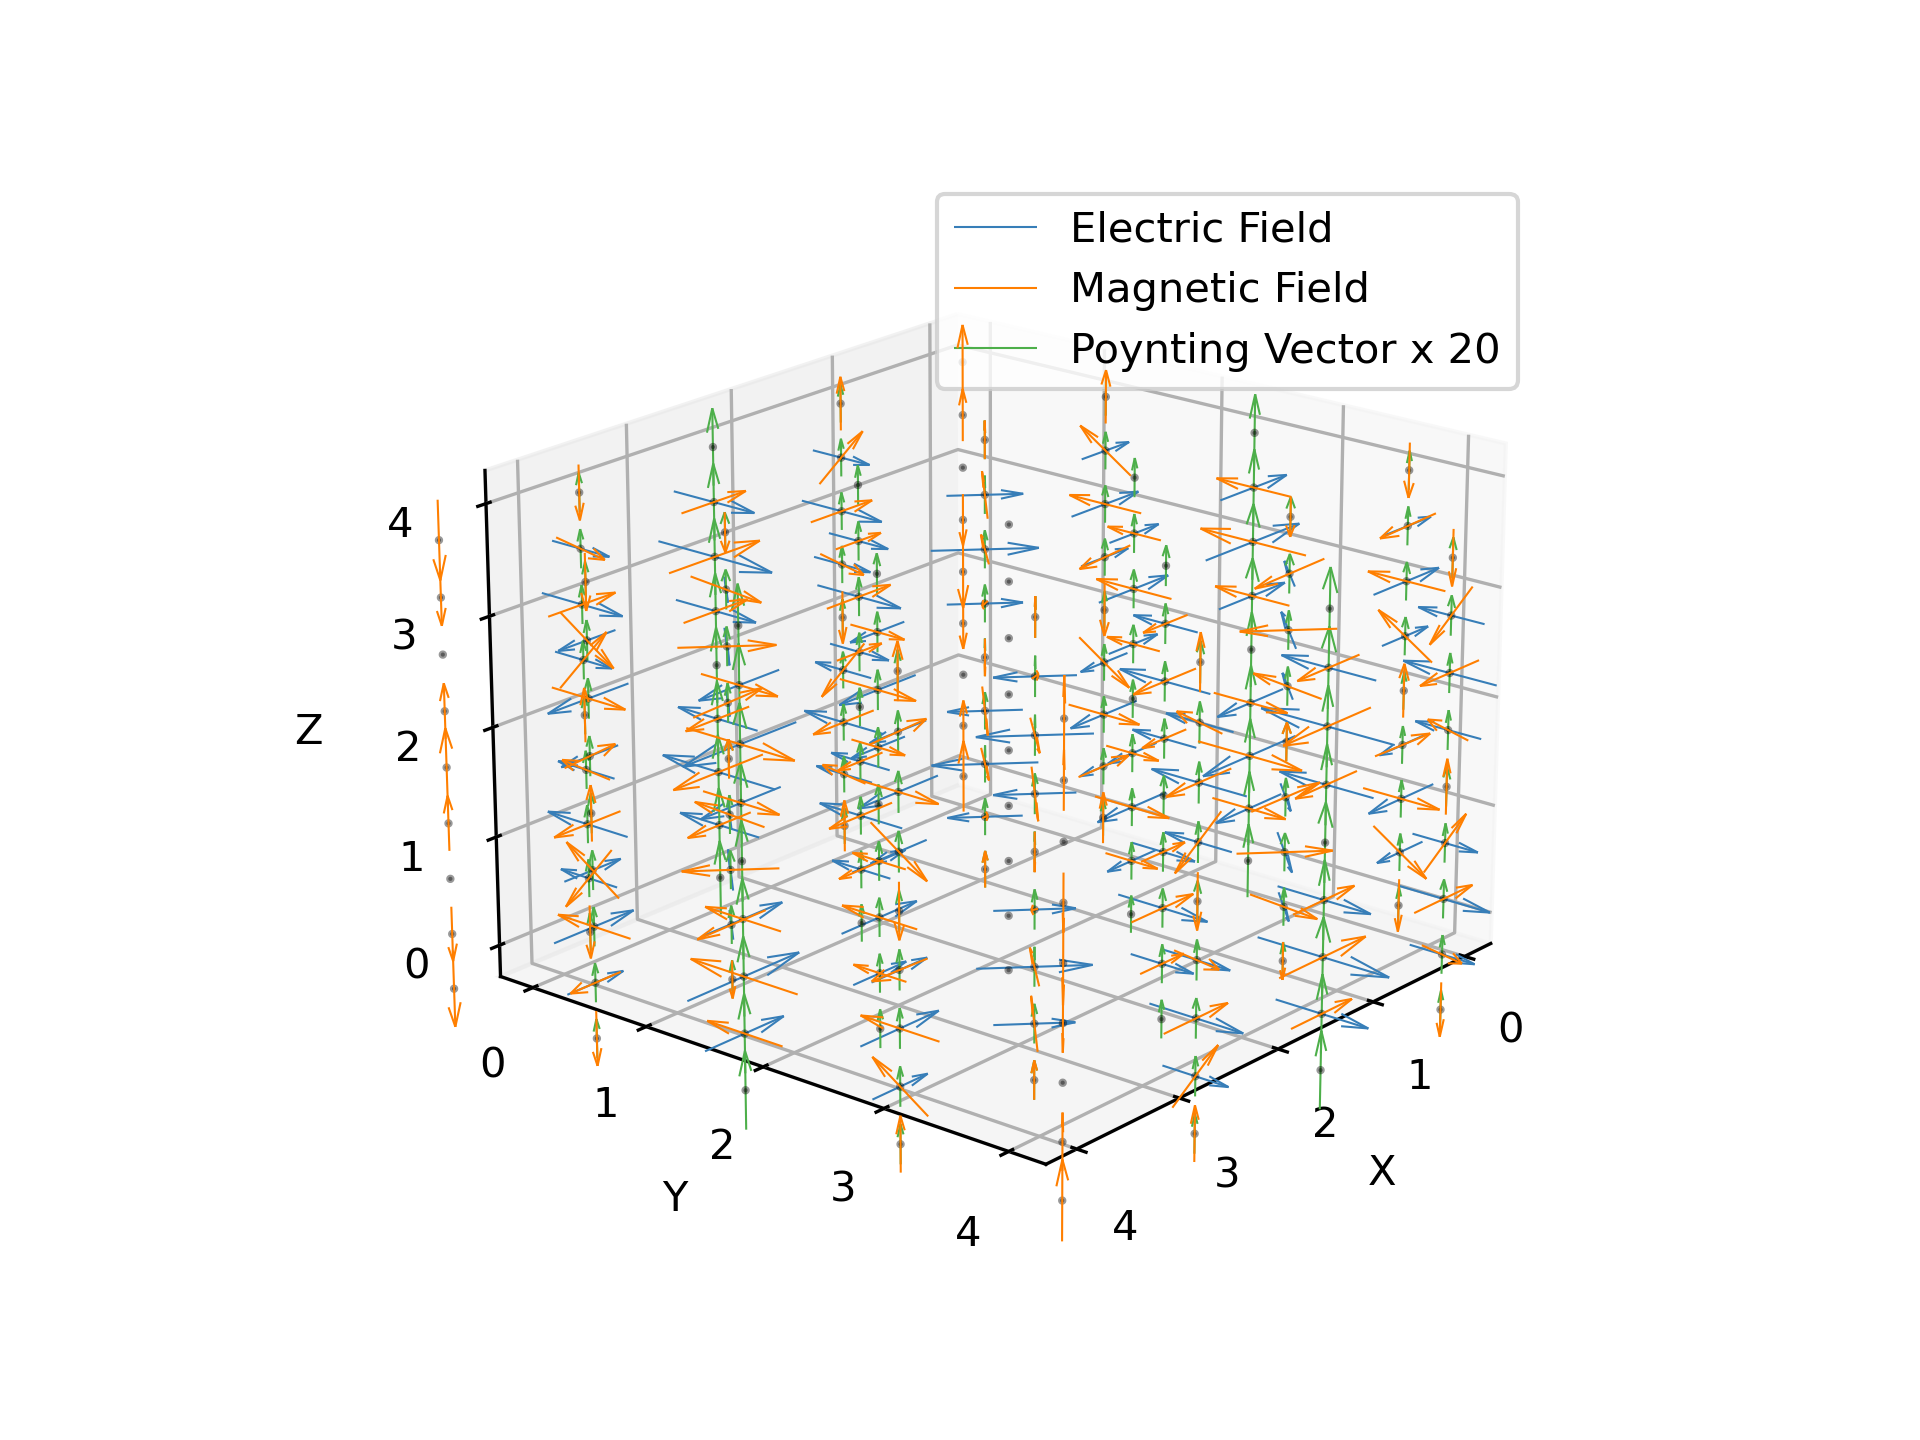

In [59]:
# Plot the field.
s_scale = 20

fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
ax.quiver3D(X,Y,Z, Ex.real, Ey.real, Ez.real, pivot='middle',
            linewidth=0.5, color=e_color, label='Electric Field')
ax.quiver3D(X,Y,Z, Bx.real, By.real, Bz.real, pivot='middle',
            linewidth=0.5, color=b_color, label='Magnetic Field')
ax.quiver3D(X,Y,Z, s_scale*Sx.real, s_scale*Sy.real, s_scale*Sz.real, pivot='middle',
            linewidth=0.5, color=s_color, label='Poynting Vector x %d' % s_scale)
ax.scatter3D(X,Y,Z,'.',s=1,c='k',alpha=0.4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.auto_scale_xyz([0, Lz], [0, Lz], [0, Lz])
ax.view_init(20,40)
ax.legend()

## Questions

Start with $M=1$ and $N=0$ — the TE₁₀ mode.  Change the longitudinal wave vector $k_z$ (the variable `kz` above).

Describe the field pattern.
- In what direction does the electric field point? The magnetic field? The Poynting vector?
- How do the fields change with position?
- Where is the electric field largest?
- Where is the Poynting vector largest? The smallest?

***Describe your observations below.***

- Before adjusting $k_z$ 
 - **E** was lumped into a sheet on top and bottom, all pointing parallel to X. The upper group pointed in the - direction, the lower in the + direction. **B** around the outside all pointed up or down. Inside, where there was an **E** the magnetic field started changing; it looks like it make be circulating, but I can't tell for sure. **S** is considerably bigger than in other plots so far, and all pointing up
 - **E** is largest in the middle of the box (alnoe y and x)
 - **S** is largest where **E** is largest
- $k_z$ = /1 
 - the **B** is still perfectly virtical along the edges, and parallel with y in the middle of the box. **E** is all parallel to x, alternating +/- and **S** is pointing up everywhere. All are large in magnitude.
- $k_z$ = /4
 - **E** is only in the middle of the box, all pointnig +x. **B** changes direction where there is **E** but not in a consistent way. There's also one sheet of points where **B** vanishes. **S** is small and all ni z direction.

Adjust the box dimensions by changing `Lx` and `Ly` in the cell near the top of the notebook and replotting.

How does the field pattern change?

***Describe your observations below.***

- I changed Lx and Ly to both = 10. This was too xrazy and made the arrows SO LONG
- Lx = 1 and Ly = 5\. **S** always up and large. **B** is influenced by **E** (which is consistent with other plots) but not near as much as before. 
- Lx=10 and Ly=1 and this is cool because the vectors are now all grouped by sheets up and down. There is a visible circulation of **B** aroudn the center of each sheet, the bottom groupings of **E** are all pointing +x and the upper groupings are all pointing -x. **S** looks positive z all around.
- I think the previous result is because it is just spreading apart the slices of vectors, so to better see ecah one and each S/E/B grouping, I set Lx 5. This showed the sam  detail, with the groups are just cloesr together. This tells me the same info, and that Lx determines how close together the vectors are along X *(but why?)*

Compare the TE₁₀ and TE₀₁ modes.  How are they similar?  How are they different?

***Describe your observations below.***

In both: **E** disappears at the edges, B circulates around some points, **E** disappears at the middle
Differences: In many places, **B** is pointing opposite directions in each.

Compare the TE₁₀ and TE₀₁ modes to the TE₁₁ mode.  How are they similar?  How are they different?

***Describe your observations below.***

T11 has way smaller poynting vectors. E appears roughyl perpendicular to the E values in T01 T10

## TM Modes

For TM modes, the longitudinal electric field must vanish on the boundaries.  This gives

$$
E_z = E_0 \, e^{i(k_z z - \omega t)} \, \sin \left( \dfrac{M \pi x}{a} \right) \, \sin\left( \dfrac{N \pi y}{b} \right)
$$

$M$ and $N$ are positive integers. $a$ and $b$ are the length and width of the rectangle.  The code below will generate a field plot for a single TM mode.

In [75]:
t = 0

# Define the mode.
M = 2
N = 1

# Define the longitudinal wave vector.
kz = np.pi / 2

# Determine compute the transverse wave vector and frequency.
a = Lx
b = Ly
kx = M*np.pi/a
ky = N*np.pi/b
omega = np.sqrt(kx**2 + ky**2 + kz**2) / n

# Define group and cutoff wavenumbers.
kg = kz
kc = np.sqrt(kx**2 + ky**2)

# Define longitudinal electric field.
E0 = 0.7
Ez = E0 * np.exp(1j*(kz*Z - omega*t)) * np.sin(M*np.pi*X/a) * np.sin(N*np.pi*Y/b)

# Compute other components of fields.
Ex = 1j * kg * kx / kc**2 * E0 * np.exp(1j*(kz*Z - omega*t)) \
    * np.cos(M*np.pi*X/a) * np.sin(N*np.pi*Y/b)
Ey = 1j * kg * ky / kc**2 * E0 * np.exp(1j*(kz*Z - omega*t)) \
    * np.sin(M*np.pi*X/a) * np.cos(N*np.pi*Y/b)
Bx = -n*omega / kg * Ey
By = n*omega / kg * Ex
Bz = np.zeros_like(Ez)

# Compute total Poynting vector.
Sx = 1/(8*np.pi*mu) * (Ey * Bz.conj() - Ez * By.conj())
Sy = 1/(8*np.pi*mu) * (Ez * Bx.conj() - Ex * Bz.conj())
Sz = 1/(8*np.pi*mu) * (Ex * By.conj() - Ey * Bx.conj())

<IPython.core.display.Javascript object>


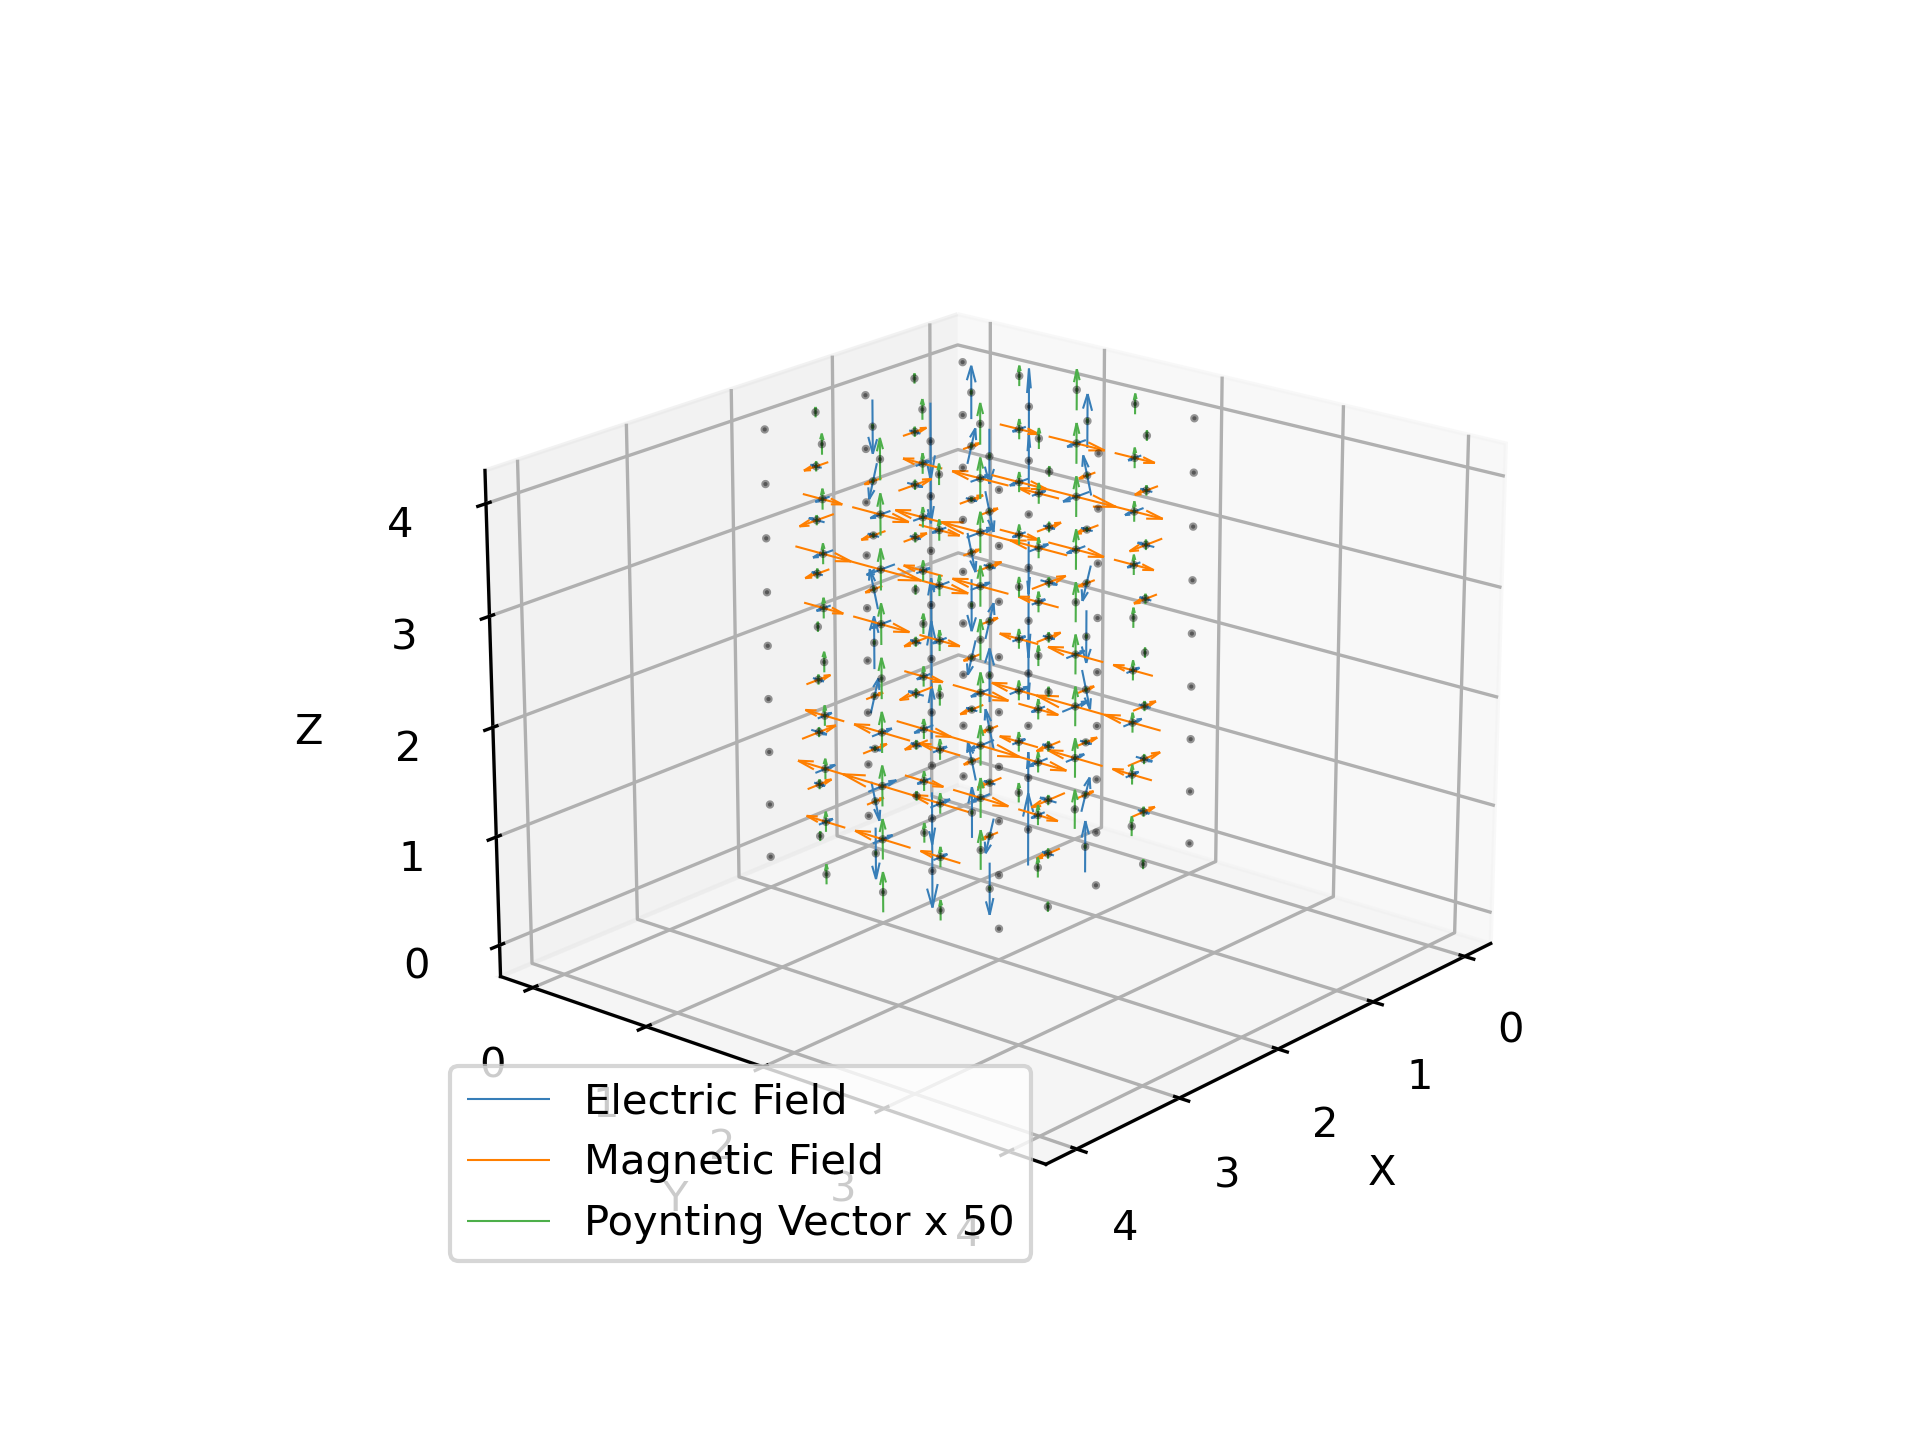

In [76]:
# Plot the field.
s_scale = 50

fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
ax.quiver3D(X,Y,Z, Ex.real, Ey.real, Ez.real, pivot='middle',
            linewidth=0.5, color=e_color, label='Electric Field')
ax.quiver3D(X,Y,Z, Bx.real, By.real, Bz.real, pivot='middle',
            linewidth=0.5, color=b_color, label='Magnetic Field')
ax.quiver3D(X,Y,Z, s_scale*Sx.real, s_scale*Sy.real, s_scale*Sz.real, pivot='middle',
            linewidth=0.5, color=s_color, label='Poynting Vector x %d' % s_scale)
ax.scatter3D(X,Y,Z,'.',s=1,c='k',alpha=0.4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.auto_scale_xyz([0, Lz], [0, Lz], [0, Lz])
ax.view_init(20,40)
ax.legend()

In [67]:
%matplotlib notebook

## Questions

Start with $M=1$ and $N=1$ — the TE₁₁ mode.  Change the longitudinal wave vector $k_z$ (the variable `kz` above).

Describe the field pattern.
- In what direction does the electric field point? The magnetic field? The Poynting vector?
- How do the fields change with position?
- Where is the electric field largest?
- Where is the Poynting vector largest? The smallest?

***Describe your observations below.***

- Made kz pi/q and the magnetic fields all became horisontal, rather than straight up and down. **E** and **S** are both larger, but **S** more significantly. **S** is all pointing up. **E** is alternating pointing outward and inward. 
- **S** does not change w position. **B** and **E** flip directions around every "sheet" of space, When **E** goes in the opposite direction, **B** changes the direction it circles.
- **E** is the same everywhere

Adjust the box dimensions by changing `Lx` and `Ly` in the cell near the top of the notebook and replotting.

How does the field pattern change?

***Describe your observations below.***

 - when Lx and LY get bigger, all the vectors/fields get bigger and further apart.
 - When Lx and LY get smaller, the arrows get too close together to discern, but it does make the separation from where B is lowest to hgihest very obvious, which was cool.

Compare the TE₁₀ and TE₀₁ modes to the TE₁₁ mode.  How are they similar?  How are they different?

***Describe your observations below.***

TM10 and TM01 dont exist.

Compare the TE₁₂ and TE₂₁ modes to the TE₁₁ mode.  How are they similar?  How are they different?

***Describe your observations below.***

Similarities: **S** has a cylindrical space around halfway b/w center and perimater that is has it's highest value, and it decreases either direction.
Difference: **E** stays visibly similar. **B** goes opposite direction. **S** 

## Images of Fields

Compare the image of a TEM mode in Figure 7-3 with the plots you made above.

- How are they similar?  How are they different?
- Is one a "better" representation of the electromagnetic wave than the other, in your opinion?  Explain why or why not.

***Describe your observations below.***

I think each is better for it's own context. The ones we made here are much better for visualising the big picture because they show the field directions all at once, in relation to each other. 7.3 just shows the overall direction of the fields in one tidy point. This is much easier to look at, but doesn't give the full picture. Each answers it's own questions.

Try to create a plot of the TEM₁₀ that resembles Figure 7-6.  You may need to adjust the box size, number of grid points, and arrow sizes.

- Is one a "better" representation of the electromagnetic wave than the other, in your opinion?  Explain why or why not.

The biggest difference between 7.6 and what we've done in the notebook is that a) E and B are separated b) our plots make it look like there are three loops of **B** but this one shows only two, and I don't know how to do either of those. After looking at them thoughm, my answer is the same - the different models are good for different contexts. I think 7.6 is better the first time learning this stuff because the **E** and **B** are so obvious and easy to see, but the pltos we made here are super important for seeing the effect they have on each other.

In your opinion what would be the ideal way to represent the electromagnetic waves in a waveguide?  It could be a combination of images, math, text, audio, video, etc.  What features would you emphasize?  What would you leave out?

I think a video with voiceover explaining why each component behaved how it did when/where it did would be the most helpful. If it could be interactive after the voiceover explains the features, and the viewer could take some practice questions, that would be a cool way to apply the concepts immediately upon learning them.

# Reflection and Summary

- What are the major takeaways of this assignment for you?
 - Just starting to generally understand connections between **E** **B** **S**
- What was the most difficult part of this assignment?
 - Still visualizing it all. The concept of a wave moving in the opposite direction of the fields is still difficult for me
- What was the most interesting part of this assignment?
 - Comparing our plots to the book models!! There are so many different options, all useful in different ways
- What questions do you have?
 - Why, for TE modes, does magnetic field vanish on the boundaries, and for TM modes electric field vanishes on the boundaries, but for TEM modes only electric field vanishes on the boundaries?

***Replace with your response.***